In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generating random Linear Dataset of 100 records.

In [23]:
X = np.random.rand(100, 1)

y = 2 + 3*X + np.random.rand(X.shape[0], X.shape[1])

print(X.shape, y.shape)

(100, 1) (100, 1)


Let's see the first few elements of the data.

In [24]:
print(X[:5])

[[0.90998893]
 [0.80132562]
 [0.81005968]
 [0.47686008]
 [0.10470256]]


In [25]:
print(y[:5])

[[5.67094944]
 [5.02180186]
 [4.93100887]
 [4.28472329]
 [2.44561105]]


#### The function `train_test_split()` will split the data between training and testing data.

In [26]:
def train_test_split(X, y, ratio=0.2):
    """Arguments: Dataset, true labels and splitting ratio
        
       returns: Dataset and labels splitted into training and testing part in a tuple
               ((X_train, X_test, y_train, y_test))
    """
    
    assert len(X) == len(y), 'Length of dataset and labels should be same.'
    assert ratio < 1, 'ratio should be less than 1.'
    
    percent = 100 - (ratio * 100)
    percent_num = int((percent/100) * len(X))
    
    X_train = X[:percent_num, :]
    X_test = X[percent_num:, :]
    y_train = y[:percent_num]
    y_test = y[percent_num:]
    
    return (X_train, X_test, y_train, y_test)

### The below class `LinearRegression` can be used to train and predict a linear model.

In [27]:
class LinearRegression():
    
    def __init__(self):
        self.costs = []
        self.coefficient = 0.0
        self.intercept = 0.0
        self.result = 0.0
        self.weight_grad = 0.0
        
    def predict(self, X):
        """Arguments: X_train, weight, bias
        
           returns: predicted values"""

        pred = np.dot(X, self.coefficient.T) + self.intercept
        return pred
    
    def mean_squared_error(self, pred, labels):
        """ Arguments: predicted_values, true_labels
        
            returns: cost(error)"""
    
        assert len(pred) == len(labels), 'Length of labels and predictions should be same.'

        # cost = 1/m * sum(labels - pred)**2

        cost = np.sum((labels-pred)**2)
        cost = cost/(2 * len(pred))

        return cost
    
    def gradients(self, X, y, weight, bias):
        """ Arguments: X_train, y_train, weight, bias
            
            returns: bias_gradient, weight_gradient"""

        p = self.predict(X)
        for i in range(self.weight_grad.shape[1]):
            self.weight_grad[:,i] = (-1 * np.dot(X[:,i].T, y - p))/len(y)
            
        bias_grad = (-1 * np.sum(y - p))/len(y)

        return (bias_grad, self.weight_grad)
    
    def fit(self, X, y, iterations, weight_init='zero', learning_rate=0.1, print_cost=True):
        """ Arguments: X_train, 
                       y_train, 
                       iterations, 
                       weight => by default 0.0,
                       bias => by default 0.0,
                       learning_rate => by default 0.1,
                       print_cost => by default True
        
            returns: learned_bias, learned_weight"""
        
        if weight_init == 'zero':
            self.coefficient = np.zeros((1, X.shape[1]))
        elif weight_init == 'random':
            self.intercept = np.random.rand(1)
            self.coefficient = np.random.rand(1, X.shape[1])
        else:
            print('Invalid parameter')
            
        self.weight_grad = np.zeros(self.coefficient.shape)
            
        for i in range(1, iterations+1):
    
            # predicting values
            prediction = self.predict(X)

            #calculating cost
            cost = self.mean_squared_error(prediction, y)

            if i % 10 == 0:
                self.costs.append(cost)
                if print_cost:
                    print(f'Cost after {i}th iteration - {cost}')

            # calculating gradients
            bias_grad, self.weight_grad = self.gradients(X, y, self.coefficient, self.intercept)

            # updating weights
            self.coefficient = self.coefficient - learning_rate * self.weight_grad
            self.intercept = self.intercept - learning_rate * bias_grad
            
        return (self.intercept, self.coefficient)
    
    def score(self, labels, pred):
        """ Arguments: labels => True labels
                       pred => predicted values
            returns: score calculated based on passed arguments."""
        
        num = np.sum((labels - pred)**2)
        den = np.sum((labels - np.mean(labels))**2)
        
        self.res = 1 - (num/den)
        return self.res

#### Let's split the data between train and test.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


### Visualizing the regression line with parameters initialized as zero before training a model.

In [29]:
y_pred = 0 + X_train*0

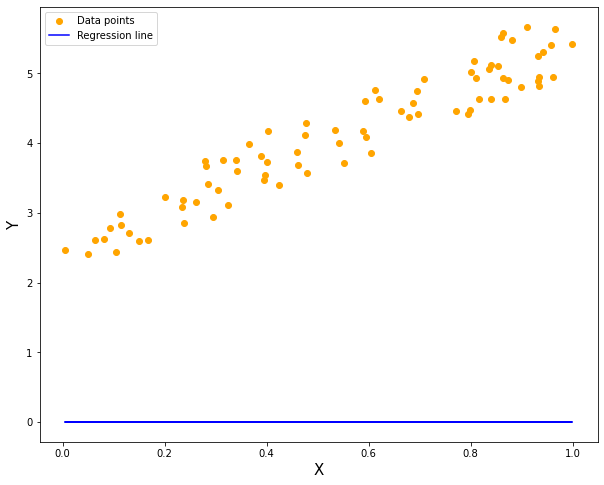

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, color='orange', label='Data points')
plt.plot(X_train, y_pred, color='blue', label='Regression line')
plt.xlabel('X', size=15)
plt.ylabel('Y', size=15)
plt.legend()
plt.show()

### Visualizing the regression line with parameters initialized randomly before training a model.

In [31]:
y_pred = np.random.rand(1) + np.random.rand(1) * X_train

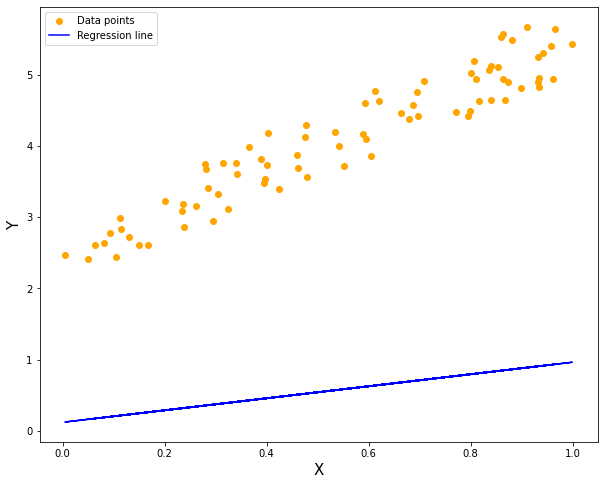

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, color='orange', label='Data points')
plt.plot(X_train, y_pred, color='blue', label='Regression line')
plt.xlabel('X', size=15)
plt.ylabel('Y', size=15)
plt.legend()
plt.show()

### Now let's train the model.

In [33]:
lin_reg = LinearRegression()
learned_bias, learned_weight = lin_reg.fit(X_train, y_train, 200, weight_init='zero')

Cost after 10th iteration - 0.7663267525422276
Cost after 20th iteration - 0.12143723099943522
Cost after 30th iteration - 0.07880593227873148
Cost after 40th iteration - 0.07196755460192306
Cost after 50th iteration - 0.06774188000878478
Cost after 60th iteration - 0.06412719311710165
Cost after 70th iteration - 0.060951602790013396
Cost after 80th iteration - 0.058156744494004396
Cost after 90th iteration - 0.05569667673419167
Cost after 100th iteration - 0.053531278413632345
Cost after 110th iteration - 0.05162525271923033
Cost after 120th iteration - 0.049947531793484656
Cost after 130th iteration - 0.04847076916667492
Cost after 140th iteration - 0.0471708939473743
Cost after 150th iteration - 0.04602671846846249
Cost after 160th iteration - 0.04501959293279121
Cost after 170th iteration - 0.04413310142576651
Cost after 180th iteration - 0.04335279433971577
Cost after 190th iteration - 0.042665952848606005
Cost after 200th iteration - 0.04206138159410483


#### Try changing the `weight_init` parameter to 'random' in `train()` method, it converges to minimum more quickly as compared to when weights initialized to zero.

In [34]:
print(f'Intercept: {lin_reg.intercept},\nCoefficient: {np.squeeze(lin_reg.coefficient)}')

Intercept: 2.646708457125878,
Coefficient: 2.668271359109591


### Predicting y with learned parameters.

In [35]:
y_pred = learned_bias + learned_weight * X_train

### Visualizing the regression line with learned parameters after training a model.

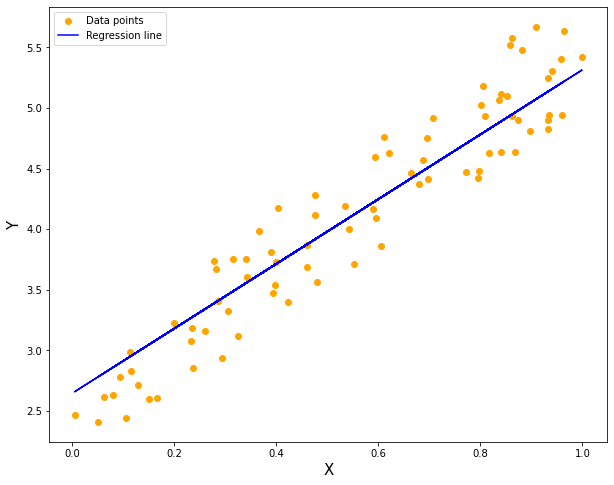

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, color='orange', label='Data points')
plt.plot(X_train, y_pred, color='blue', label='Regression line')
plt.xlabel('X', size=15)
plt.ylabel('Y', size=15)
plt.legend()
plt.show()

### Now we'll calculate R<sup>2</sup> score using `score()` which shows how well our model is performing.

R<sup>2</sup> value ranges between 0 and 1. The higher the R<sup>2</sup> value the better the model.

In [37]:
lin_reg.score(y_train, y_pred)

0.8984074959373981

Here were are able to get a good score, because we've calculated on the trained data now let's check how it performs on test data(unseen while training).

In [38]:
y_test_pred = lin_reg.predict(X_test)
lin_reg.score(y_test_pred, y_test)

0.7874312674020844

#### So it's performing quite well on the test data as well, one reason behind this is because we've generated a linear data. The performance will differ on real world datasets.

### Visualizing Cost vs Iterations
This shows how cost value decreases with the no. of iterations

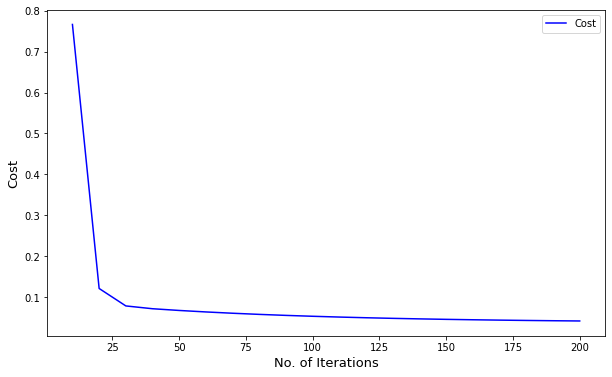

In [39]:
iterations = [i*10 for i in range(1, len(lin_reg.costs)+1)]
plt.figure(figsize=(10, 6))
plt.plot(iterations, lin_reg.costs, color='blue', label='Cost')
plt.xlabel('No. of Iterations', fontsize=13)
plt.ylabel('Cost', fontsize=13)
plt.legend()
plt.show()
# iterations